In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt
import scipy


Dataset from : https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
data=pd.read_csv('creditcard.csv')

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.shape

(284807, 31)

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data=data.sample(frac=0.1,random_state =1)

print(data.shape)

(28481, 31)


In [11]:
data.hist(figsize=(20,20))
%matplotlib inline
plt.show()

In [15]:
fraud=data[data['Class']==1]
Valid=data[data['Class']==0]

outlier_fraction=len(fraud)/float(len(Valid))

In [16]:
outlier_fraction

0.0017234102419808666

In [17]:
len(fraud)

49

In [18]:
len(Valid)

28432

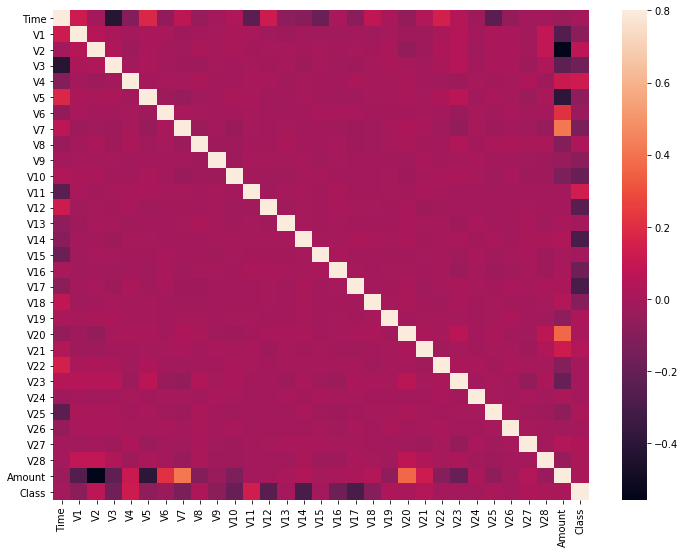

In [21]:
cormat=data.corr()
fig =plt.figure(figsize =(12,9))

sns.heatmap(cormat,vmax=.8)

In [22]:
columns=data.columns.tolist()

In [24]:
columns=[c for c in columns if c not in ["Class"]]
target="Class"
X=data[columns]
Y=data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [25]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#svm takes more time
#localoutlier finds deviation from its neighbors 
#isolation isolates by randomly selection features and splitting which has shorter pathlengths


In [26]:
state=1
classifiers={
    "Isolation Forest":IsolationForest(max_samples=len(X),
                                      contamination=outlier_fraction,
                                      random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}

In [29]:
n_outliers=len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    if clf_name =="Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scores_pred= clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
        
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    
    n_error=(y_pred!=Y).sum()
    
    print('{}:{}'.format(clf_name,n_error))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))  

Isolation Forest:71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

